In [98]:
# BLOCO 1: CONFIGURAÇÕES DO PROGRAMA

## IMPORTS PARA O FUNCIONAMENTO DO PROGRAMA
import random as rd
import numpy as np
try:
    import matplotlib.pyplot as plt
except:
    print('Erro ao importar biblioteca  "matplotlib.pyplot"!')
    
## VARIÁVEIS GLOBAIS QUE DITAM O COMPORTAMENTO DA POPULAÇÃO
CROSSOVER_RATE = 0.8
MUTATION_RATE = 0.05
TAMANHO_POP=8                                                                           #tamanho da população
NUMERO_DE_OBJETOS = 8                                                                   #número de objetos disponiveis
CAPACIDADE_DA_MOCHILA = 35                                                              #peso máximo da mochila
PROPRIEDADES = [[10,5],[18,8],[12,7],[14,6],[13,9],[11,5],[8,4],[6,3]]                  #lista contendo o peso acompanhado do valor de cada objeto 

In [99]:
# BLOCO 2: FUNÇÃO PARA CRIAR A POPULAÇÃO

def criaPop(tamanho=TAMANHO_POP, num = NUMERO_DE_OBJETOS):
    pop = list()                                                #lista para armazenar a população
    individuo = list()                                          #lista para armazenar um individuo
    for c in range(0,tamanho):                                  #laço para gerar os N individuos da população
        for x in range(0,num):                                  #laço para gerar um individuo
            n = rd.randint(0,1)                                 #sorteia um valor de n
            individuo.append(n)                                 #adiciona esse valor a lista do inidividuo
        pop.append(individuo[:])                                #adiciona na lista pop o individuo gerado   
        individuo.clear()                                       #limpa a lista do individuo e repete o processo
    return pop
            
    

In [100]:
# BLOCO 3: TESTE DA FUNÇÃO ACIMA

pop_teste = criaPop()
print(pop_teste)

[[0, 1, 1, 0, 1, 1, 1, 0], [0, 0, 1, 1, 0, 1, 1, 1], [0, 0, 0, 1, 0, 1, 0, 0], [0, 1, 0, 1, 1, 0, 1, 1], [1, 0, 0, 1, 1, 0, 0, 0], [1, 1, 0, 1, 1, 1, 1, 0], [1, 0, 1, 0, 1, 0, 0, 0], [0, 0, 1, 1, 0, 0, 1, 1]]


In [101]:
# BLOCO 4: FUNÇÃO DE APTIDÃO DE UM INDIVÍDUO

def individualFitness(individuo, propriedades = PROPRIEDADES, cap = CAPACIDADE_DA_MOCHILA):
    ## descobrindo o rho
    rho_possivel = list()                                           #lista para armazenar os possiveis rhos 
    beneficio = peso_total = 0                                      #beneficio e peso total da solução candidata
    for c in propriedades:                                          
        rho_possivel.append(c[1]/c[0])                              #armazena todos os rhos possiveis
    rho = max(rho_possivel)                                         #descobre o rho
    
    ## verificando o indivíduo
    for c in range(0,NUMERO_DE_OBJETOS):                            #laço para analisar o individuo
        if individuo[c] == 1:                                       #verifica se ele contem o objeto
            beneficio += propriedades[c][1]                         #incrementa o valor do beneficio
            peso_total += propriedades[c][0]                        #incremeta o valor do peso total
    if peso_total > cap:                                            #verifica se tem penalidade
        fitness = beneficio - rho*(peso_total-cap)                  #aplica penalidade, caso tenha
    else:
        fitness = beneficio                                         
    return fitness
    

In [102]:
# BLOCO 5: TESTE DA FUNÇÃO ACIMA

fitness = individualFitness([1, 0, 1, 0, 1, 0, 0, 0])
print(fitness)

21


In [103]:
# BLOCO 6: FUNÇÃO DE APTIDÃO DA POPULAÇÃO

def popFitness(pop):
    pop_fitness = list()                                        #lista para armazenar os fitness
    for individuo in pop:                                       #varre a população
        pop_fitness.append(individualFitness(individuo))        #armazena o fitness do individuo na lista
    return pop_fitness

In [104]:
# BLOCO 7: TESTE DA FUNÇÃO ACIMA

pop_fitness = popFitness(pop_teste)
print(pop_fitness)

[14.307692307692307, 13.923076923076923, 11, 13.384615384615387, 18.615384615384617, 10.0, 21, 16.53846153846154]


In [105]:
# BLOCO 8: MECANISMO DE SELEÇÃO DOS PAIS

def roletaPais(pop):
    pais = list()                                   #lista para armazenar os roletados
    porcentagens = list()                           #lista para armazenar as porcentagens de cada individuo
    pop_fitness = popFitness(pop)                   #armazena o fitness da população
    fitness_total = por = 0                         #variaveis para definir as porcentagens

    for fitness in pop_fitness:
        fitness_total += fitness                    #soma todos os fitness da população
    
    for fitness in pop_fitness:                     #varre todos os fitness da população
        por += (fitness/fitness_total)              #calcula a porcentagem do individuo
        porcentagens.append(por)                    #adiciona a porcentagem na lista
    
    for c in range(0,TAMANHO_POP):                  #laço para sortear os individuos
        n = rd.random()                             #roleta um numero
        for i in range(0,TAMANHO_POP):              #analisa qual individuo foi sorteado
            if n <= porcentagens[i]:
                pais.append(pop[i])                 
                break
    return pais


    

In [106]:
# BLOCO 9: TESTE DA FUNÇÃO ACIMA

pais_teste = roletaPais(pop_teste)
print(pais_teste)

[[1, 1, 0, 1, 1, 1, 1, 0], [1, 0, 1, 0, 1, 0, 0, 0], [1, 0, 0, 1, 1, 0, 0, 0], [1, 0, 0, 1, 1, 0, 0, 0], [1, 0, 0, 1, 1, 0, 0, 0], [0, 0, 1, 1, 0, 1, 1, 1], [1, 0, 1, 0, 1, 0, 0, 0], [1, 1, 0, 1, 1, 1, 1, 0]]


In [107]:
# BLOCO 10: MECANISMO DE CRUZAMENTO

def cruzamento(pop, pais, crossover_rate=CROSSOVER_RATE):
    new_pop = list()
    filho = list()
    for c in range(0,TAMANHO_POP,2):
        if rd.random() < crossover_rate:
            ponto_de_corte = rd.randint(1,NUMERO_DE_OBJETOS-1)
            for i in range(0,ponto_de_corte):
                filho.append(pais[c][i])
            for i in range(ponto_de_corte,TAMANHO_POP):
                filho.append(pais[c+1][i])
            new_pop.append(filho[:])
            filho.clear()
            for i in range(0,ponto_de_corte):
                filho.append(pais[c+1][i])
            for i in range(ponto_de_corte,TAMANHO_POP):
                filho.append(pais[c][i])
            new_pop.append(filho[:])
            filho.clear()   
        else:
            new_pop.append(pop[c])
            new_pop.append(pop[c+1])
    return new_pop

In [108]:
# BLOCO 11: TESTE DA FUNÇÃO ACIMA

pop_teste = cruzamento(pop_teste,pais_teste)
print(pop_teste)

[[1, 0, 1, 0, 1, 0, 0, 0], [1, 1, 0, 1, 1, 1, 1, 0], [1, 0, 0, 1, 1, 0, 0, 0], [1, 0, 0, 1, 1, 0, 0, 0], [1, 0, 0, 1, 1, 0, 0, 1], [0, 0, 1, 1, 0, 1, 1, 0], [1, 0, 1, 0, 1, 0, 0, 0], [0, 0, 1, 1, 0, 0, 1, 1]]


In [109]:
# BLOCO 12: MECANISMO DE MUTAÇÃO

def mutation(pop, mutation_rate=MUTATION_RATE):
    nova_pop = list()                                           #lista para a população com mutação
    for individuo in pop:                                       #varre a população sem mutação
        if(rd.random() < mutation_rate):                        #verifica se o individuo será mutado
            bit_flip = rd.randint(0,7)                          #define em qual posição acontecerá a mutação
            if individuo[bit_flip] == 0:                        
                individuo[bit_flip] = 1                         #inverte o bit do individuo
            else:
                individuo[bit_flip] = 0                         #inverte o bit do individuo
            nova_pop.append(individuo)                          #adiciona o individuo na nova população
        else:
            nova_pop.append(individuo)                          #caso não tenha mutação, adiciona o individuo sem alterações na nova população 
    return nova_pop

In [110]:
# BLOCO 13: TESTE DA FUNÇÃO ACIMA

pop_teste = mutation(pop_teste)
print(pop_teste)

[[1, 0, 1, 0, 1, 0, 0, 0], [1, 1, 0, 1, 1, 1, 1, 0], [1, 0, 0, 1, 1, 0, 0, 0], [1, 0, 0, 1, 1, 0, 0, 0], [1, 0, 0, 1, 1, 0, 0, 1], [0, 0, 1, 1, 0, 1, 1, 0], [1, 0, 1, 0, 1, 0, 0, 0], [0, 0, 1, 1, 0, 0, 1, 1]]


In [111]:
# BLOCO 14: FUNÇÃO DE COLETA DE DADOS PARA O GRÁFICO

def coletaDados(bests, bests_medio, geracoes, pop_fitness, geracao_atual):
    bests.append(max(pop_fitness))                                                  #adiciona o melhor individuo na lista dos melhores
    geracoes.append(geracao_atual)                                                  #adiciona a geração atual na lista de gerações
    media = 0                                                                       
    for c in pop_fitness:
        media += c                                                                  #soma todos os fitness da geração atual
    media = media/len(pop_fitness)                                                  #calcula a media dos fitness
    bests_medio.append(media)                                                       #adiciona a media dos fitness na lista

In [112]:
# BLOCO 15: FUNÇÃO GRÁFICA

try: 
    def grafico(x,y,x_title, y_title,title):
        figura = plt.figure(figsize=(20,4))                         #cria gráfico vazio
        figura.add_subplot(131)                                     #define o espaço em que o gráfico sera plotado
        plt.plot(x,y)                                               #plota o gráfico com as duas listas
        plt.xlabel(x_title)                                         #nomeia o eixo x
        plt.ylabel(y_title)                                         #nomeia o eixo y
        plt.title(title)                                            #nomeia o titulo
        plt.show()                                                  #mostra o gráfico
except:
    print('Erro ao criar função "def grafico(geracoes,bests):"!')

In [113]:
# BLOCO 16: DESCOBRINDO O MELHOR INDIVÍDUO POSSIVEL PARA A CONDIÇÃO DE PARADA
import numpy as np
import itertools

todos_individuos = [np.reshape(np.array(i), (NUMERO_DE_OBJETOS, 1)) for i in itertools.product([0, 1], repeat = NUMERO_DE_OBJETOS)]             #cria uma lista com todos os individuos possiveis
todos_fitness = popFitness(todos_individuos)                                                                                                    #lista com todos os fitness possiveis
GABARITO = (max(todos_fitness))                                                                                                                 #melhor individuo possivel com base nas propriedades  
print(GABARITO)

21


Melhor indivíduo inicial: [1, 0, 0, 1, 1, 0, 0, 0]; Fitness: 18.615
Numero de gerações: 577
Melhor indivíduo final: [1, 0, 1, 0, 1, 0, 0, 0]; Fitness: 21.000


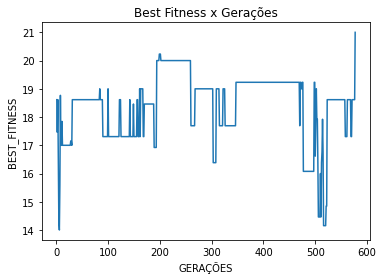

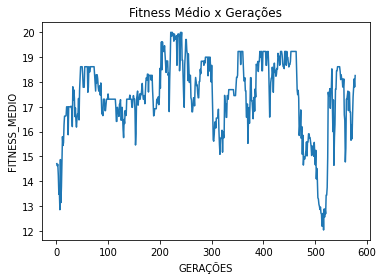

In [114]:
# BLOCO 17: ALGORITMO GENÉTICO COMPLETO

## listas de informações para os gráficos
bests = list()
bests_medio = list()
geracoes = list()

## inicialização da população
pop = criaPop()                                                                     #cria a população inicial
pop_fitness = popFitness(pop)                                                       #analisa o fitness da população
best = max(pop_fitness)                                                             #descobre o melhor fitness da população inicial
pos_best = pop_fitness.index(best)                                                  #descobre a posição do melhor individuo
i = 1                                                                               #contador de gerações
coletaDados(bests, bests_medio, geracoes, pop_fitness, i)                           #coleta dados para o gráfico
print(f'Melhor indivíduo inicial: {pop[pos_best]}; Fitness: {best:.3f}')

## GGA
while best !=GABARITO:                                                                    #condição de parada: achar o individuo perfeito
    pais = roletaPais(pop)                                                          #escolhe os pais da geração
    pop = cruzamento(pop,pais)                                                      #cruza os pais e substitui a população
    pop = mutation(pop)                                                             #aplica a mutação
    pop_fitness = popFitness(pop)                                                   #analisa o fitness da nova população
    best = max(pop_fitness)                                                         #descobre o melhor individuo da nova geração
    i += 1                                                                          #incrementa o contador de gerações
    coletaDados(bests, bests_medio, geracoes, pop_fitness, i)                       #coleta dados para o gráfico

## informações finais
pos_best = pop_fitness.index(best)                                                  #descobre a posição do melhor individuo
print(f'Numero de gerações: {i}')                                              
print(f'Melhor indivíduo final: {pop[pos_best]}; Fitness: {best:.3f}')
try:
    grafico(geracoes,bests, 'GERAÇÕES', 'BEST_FITNESS', 'Best Fitness x Gerações')
    grafico(geracoes,bests_medio, 'GERAÇÕES', 'FITNESS_MEDIO', 'Fitness Médio x Gerações')
except:
    print('Erro ao gerar gráfico!')
    

# **RELATÓRIO KNAPSACK PROBLEM**
### Aluno 1: Vando Carlos Diniz Reis - 2019057195 
### Aluno 2: Rafael Moura Marques - 2019089305
---
# _*INTRODUÇÃO*_: 
---
# *_IMPLEMENTAÇÃO_*: 
### <ins>Representação escolhida:</ins>
Um indivíduo é representado por uma lista de 8 elementos (o tamanho pode ser mudado no código),  que possuem valor 0 ou 1. O algoritmo preenche aleatoriamente o valor de cada elemento. O 1 indica que o indivíduo possui o objeto associado àquela posição, enquanto o 0 indica o contrário. 

Exemplo: [1,1,1,1,1,1,1,0]
	
Neste caso, o indivíduo possui todos os objetos disponíveis, menos o último.
	
Já a população é representada por uma lista contendo 8 indivíduos (o tamanho desta lista também pode ser alterado no código), chamada `pop`. Para mais detalhes olhar os blocos 1 e 2. 
### <ins>Função de Aptidão:</ins>
A função de aptidão define a qualidade de uma solução candidata. Neste caso o benefício é uma relação entre o valor que os objetos renderam ao indivíduo com o seu peso total. Não é muito benéfico um indivíduo possuir todos os objetos pois assim ele ultrapassará a capacidade da mochila, e consequentemente, receberá uma penalidade. A avaliação da qualidade de uma solução candidata é dada pela seguinte fórmula: 




![Função-de-Aptidão](./img/Formula.png)

### <ins>Função de Aptidão:</ins>
### <ins>Mecanismos de Seleção dos Pais:</ins>
### <ins>Operador de Cruzamento:</ins>
### <ins>Operador de Mutação:</ins>
### <ins>Mecanismo de Seleção de Sobreviventes:</ins>
### <ins>Gráficos:</ins>
### <ins>Testes:</ins>

### <ins>Condição de Parada:</ins>
O algoritmo só termina quando encontra a solução perfeita. A solução perfeita é encontrada no bloco  16. Nele criamos uma lista com todos os indivíduos possíveis e analisamos qual tinha o maior fitness.
### <ins>Código Principal:</ins>
Olhar bloco 17
